<h4>Data Preparation</h4>

In [474]:
import pandas as pd
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [475]:
# Read the input csv file into a variable
df = pd.read_csv("train.csv")

In [476]:
df.columns # Column names

Index([u'PassengerId', u'Survived', u'Pclass', u'Name', u'Sex', u'Age',
       u'SibSp', u'Parch', u'Ticket', u'Fare', u'Cabin', u'Embarked'],
      dtype='object')

In [477]:
# Create a new data-frame, and add to it the variables we are going to fit
X = pd.DataFrame()
X['sex'] = df['Sex']
X['age'] = df['Age']
X['survived'] = df['Survived']
X['Pclass'] = df['Pclass']
X['Parch'] = df['Parch']
X['SibSp'] = df['SibSp']
X['Fare'] = df['Fare']

In [478]:
# For Pclass, we would hot-encode using Pclass_1 and Pclass_3 (as they form the majority). If both Pclass_1 and
# Pclass_2 are '0', the observation falls into Pclass_2
X.Pclass.value_counts()

3    491
1    216
2    184
Name: Pclass, dtype: int64

In [479]:
# For Parch, we would consider Parch_0, Parch_1 and Parch_2 (678+118+80). If all three of them are set to '0',
# the observation falls into into 2,3,4,5 or 6 (80+5+4+5+1)
X.Parch.value_counts()

0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

In [480]:
# For SibSp, we would consider SibSp_0 and SibSp_1 (608+209). If these are set to '0', the observation falls into
# one of the other classes (2,3,4,5,8)
X.SibSp.value_counts()

0    608
1    209
2     28
4     18
3     16
8      7
5      5
Name: SibSp, dtype: int64

In [481]:
AvgAge = X.age.mean() # Calculate the average age...
X.age = X.age.fillna(value = AvgAge) # and set all missing instances of age to it

In [482]:
y = X['survived'] # Set 'survived' as the dependent variable...
X = X.drop(['survived'], axis=1) # and drop it from the list of features

<h4>The following lines would hot-encode the following variables - 'sex', 'Pclass', 'Parch' and 'SibSp'</h4>

In [483]:
X['sex'] = pd.get_dummies(X.sex)['female']

In [484]:
X = X.join(pd.get_dummies(df.Pclass, prefix='Pclass'))
X = X.drop(['Pclass', 'Pclass_2'], axis=1)

In [485]:
X = X.join(pd.get_dummies(df.Parch, prefix='Parch'))
X = X.drop(['Parch', 'Parch_3', 'Parch_4', 'Parch_5', 'Parch_6'], axis=1)

In [486]:
X = X.join(pd.get_dummies(df.SibSp, prefix='SibSp'))
X = X.drop(['SibSp', 'SibSp_2', 'SibSp_3', 'SibSp_4', 'SibSp_5', 'SibSp_8'], axis=1)

In [487]:
# The final data-frame that would be fed into Logistic Regression
X

,sex,age,Fare,Pclass_1,Pclass_3,Parch_0,Parch_1,Parch_2,SibSp_0,SibSp_1
0,0,22.000000,7.2500,0,1,1,0,0,0,1
1,1,38.000000,71.2833,1,0,1,0,0,0,1
2,1,26.000000,7.9250,0,1,1,0,0,1,0
3,1,35.000000,53.1000,1,0,1,0,0,0,1
4,0,35.000000,8.0500,0,1,1,0,0,1,0
5,0,29.699118,8.4583,0,1,1,0,0,1,0
6,0,54.000000,51.8625,1,0,1,0,0,1,0
7,0,2.000000,21.0750,0,1,0,1,0,0,0
8,1,27.000000,11.1333,0,1,0,0,1,1,0
9,1,14.000000,30.0708,0,0,1,0,0,0,1


In [488]:
# Revised list of columns
X.columns

Index([u'sex', u'age', u'Fare', u'Pclass_1', u'Pclass_3', u'Parch_0',
       u'Parch_1', u'Parch_2', u'SibSp_0', u'SibSp_1'],
      dtype='object')

In [489]:
# Scale the data prior to running regression
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X= scaler.fit_transform(X)

In [490]:
# Split the data into train and test datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [491]:
# Scaled Data
X

array([[-0.73769513, -0.5924806 , -0.50244517, ..., -0.31407587,
        -1.46574551,  1.80642129],
       [ 1.35557354,  0.63878901,  0.78684529, ..., -0.31407587,
        -1.46574551,  1.80642129],
       [ 1.35557354, -0.2846632 , -0.48885426, ..., -0.31407587,
         0.68224668, -0.55358072],
       ..., 
       [ 1.35557354,  0.        , -0.17626324, ...,  3.18394409,
        -1.46574551,  1.80642129],
       [-0.73769513, -0.2846632 , -0.04438104, ..., -0.31407587,
         0.68224668, -0.55358072],
       [-0.73769513,  0.17706291, -0.49237783, ..., -0.31407587,
         0.68224668, -0.55358072]])

<h4>Logistic Model</h4>

In [492]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(penalty='l2', C=1)

In [493]:
model.fit(X_train, y_train)

LogisticRegression(C=1, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [494]:
from sklearn.metrics import accuracy_score
print "Logistic accuracy is %2.2f" % accuracy_score(y_test,model.predict(X_test))

Logistic accuracy is 0.81


In [495]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import classification_report

In [496]:
print "---Logistic Model---"
logit_roc_auc = roc_auc_score(y_test, model.predict(X_test))
print "Logistic AUC = %2.2f" % logit_roc_auc
print classification_report(y_test, model.predict(X_test) )

---Logistic Model---
Logistic AUC = 0.80
             precision    recall  f1-score   support

          0       0.81      0.88      0.84       105
          1       0.80      0.72      0.76        74

avg / total       0.81      0.81      0.81       179



In [497]:
from sklearn.metrics import roc_curve
fpr, tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test)[:,1])

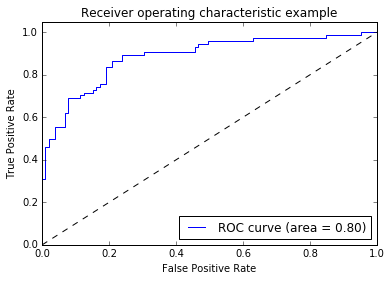

In [498]:
# Plot of a ROC curve for a specific class
plt.figure()
plt.plot(fpr, tpr, label='ROC curve (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic example')
plt.legend(loc="lower right")
plt.show()